<a href="https://colab.research.google.com/github/roeyrach/audio_decoder/blob/main/audio_decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob

In [ ]:
file = "/content/sample_data/sos-in-morse-69211.mp3"
file1 = "/content/sample_data/I_love_you_morse_code.ogg.mp3"
ipd.Audio(file1)

In [ ]:
y, sr = librosa.load(file1)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
digits_storage = {
    "01" : "A",
    "1000" : "B",
    "1010" : "C",
    "100" : "D",
    "0" : "E",
    "0010" : "F",
    "110" : "G",
    "0000" : "H",
    "00" : "I",
    "0111" : "J",
    "101" : "K",
    "0100" : "L",
    "11" : "M",
    "10" : "N",
    "111" : "O",
    "0110" : "P",
    "1101" : "Q",
    "010" : "R",
    "000" : "S",
    "1" : "T",
    "001" : "U",
    "0001" : "V",
    "011" : "W",
    "1001" : "X",
    "1011" : "Y",
    "1100" : "Z",
}

In [ ]:
moving_var = []
window = 100
l = np.array(y)
for i in range(len(l) - 10):
  moving_var.append(sum([j * j for j in l[i:i + window]]) / window - 
                    (sum(l[i:i + window]) / window)**2)

In [ ]:
bits = []
count_avg_list = []
time_between_bits = []
thresh_hold_if_bit = 0.005
thresh_hold_sizeof_bit = 100
len_mv = len(moving_var)
counter = 0
for mv in range(len_mv):
  if thresh_hold_if_bit < moving_var[mv]:
    counter += 1
  elif counter != 0:
    if counter > thresh_hold_sizeof_bit:
      count_avg_list.append(counter)
      time_between_bits.append(mv)
      counter = 0
count_avg = np.mean(count_avg_list)

for i in count_avg_list:
  if i < count_avg:
    bits.append(0)
  else:
    bits.append(1)

print(bits)
print(time_between_bits)
print(count_avg_list)

[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1]
[2096, 5037, 23097, 28977, 31919, 34861, 45781, 51668, 57542, 65525, 68466, 71408, 77293, 85269, 106269, 109211, 115091, 120972, 131892, 137779, 143654, 151637, 154578, 160457]
[1544, 1546, 1544, 4483, 1543, 1545, 4480, 4489, 4482, 1541, 1540, 1546, 4489, 1542, 4480, 1544, 4479, 4484, 4483, 4485, 4484, 1542, 1544, 4478]


In [ ]:
delta_list = []
for i in range(len(time_between_bits) - 1):
  delta_list.append((time_between_bits[i + 1] - time_between_bits[i]) - 
                    count_avg_list[i + 1])
print(delta_list)

[1395, 16516, 1397, 1399, 1397, 6440, 1398, 1392, 6442, 1401, 1396, 1396, 6434, 16520, 1398, 1401, 1397, 6437, 1402, 1391, 6441, 1397, 1401]


In [ ]:
sentence = []
high_th = 7000
low_th = 2000
word = []
digit = []
for i in range(len(bits) - 1):
  if delta_list[i] <= low_th:
    digit.append(bits[i])
  elif delta_list[i] > low_th and delta_list[i] < high_th:
    digit.append(bits[i])
    word.append(digit.copy())
    digit = []
  elif delta_list[i] >= high_th:
    digit.append(bits[i])
    word.append(digit.copy())
    digit = []
    sentence.append(word.copy())
    word = []
  if i == len(bits) - 2:
    digit.append(bits[i])
    word.append(digit.copy())
    digit = []
    sentence.append(word.copy())
    word = []

print(sentence)

[[[0, 0]], [[0, 1, 0, 0], [1, 1, 1], [0, 0, 0, 1], [0]], [[1, 0, 1, 1], [1, 1, 1], [0, 0, 0]]]


In [ ]:
sen = ""
for word in sentence:
  w = ""
  for digit in word:
    d = ""
    for bit in digit:
      d+=str(bit)
    w += digits_storage.get(d)
  sen += w + " "
print(sen)

I LOVE YOS 


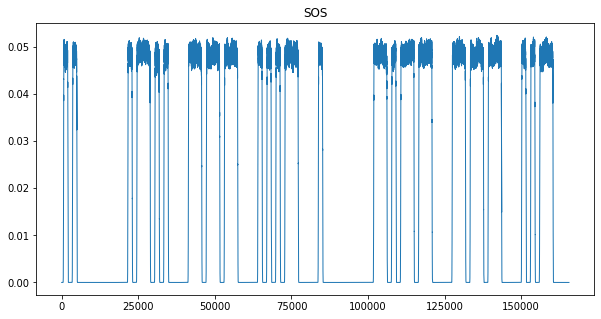

In [ ]:
pd.Series(moving_var).plot(figsize=(10,5), lw=1, title='SOS')
plt.show()